# Linear least squares

## Fitting data by polynomials

Here are 5-year averages of the worldwide temperature anomaly as compared to the 1951-1980 average (source: NASA).

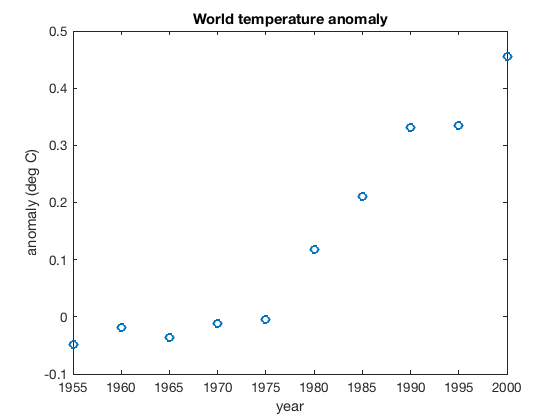

In [1]:
year = (1955:5:2000)';
anomaly = [ -0.0480, -0.0180, -0.0360, -0.0120, -0.0040, 0.1180, 0.2100, 0.3320, 0.3340, 0.4560 ]';
plot(year,anomaly,"o");
title("World temperature anomaly");
xlabel("year"); ylabel("anomaly (deg C)");

The numbers work better if we measure time in years since 1955. (We can quantify the reasons later in the course.) 

In [2]:
t = year - 1955;
m = length(t)


m =

    10



A polynomial through all of these points has to have degree at least 9 in general (i.e., unless the points are special). We can solve for the coefficients of this polynomial by solving a $10\times 10$ Vandermonde system.

In [3]:
A = t.^(0:m-1);  % using broadcasting 
b = anomaly;

c = A\b   % coefficients, from degree 0 to m-1

p = @(yr) polyval(c(end:-1:1),yr-1955);  % interpolating function



c =

   -0.0480
    0.3655
   -0.1821
    0.0360
   -0.0037
    0.0002
   -0.0000
    0.0000
   -0.0000
    0.0000



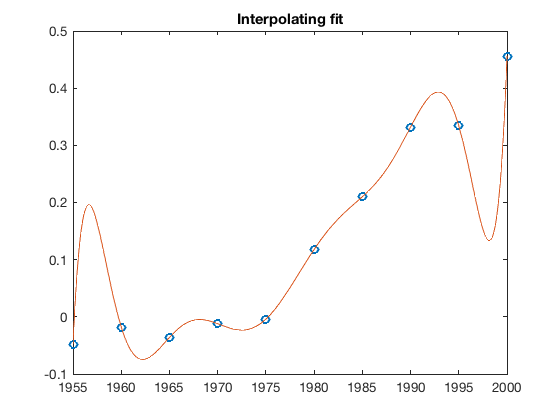

In [4]:
plot(year,anomaly,"o");
hold on, fplot(p,[1955 2000]);
title("Interpolating fit")

As intended, the polynomial interpolates the data, but it obviously gives a lot of unphysical nonsense. This phenomenon, which is common with interpolating polynomials over equally spaced nodes, is an example of _overfitting_ in machine learning. 

We actually get a better approximation by reducing the degree to 3. 

In [5]:
A = A(:,1:4);

We now have an overdetermined system of linear equations. The easiest way to define a solution is to minimize the 2-norm of the residual--i.e., least squares. In MATLAB we use the same backslash operator as for square systems, even though the algorithms are very different. 


c =

   -0.0262
   -0.0091
    0.0008
   -0.0000



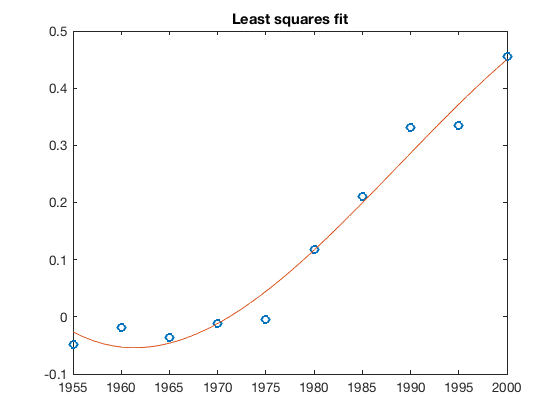

In [6]:
c = A\b   % coefficients, from degree 0 to 3

p = @(yr) polyval(c(end:-1:1),yr-1955);
plot(year,anomaly,"o");
hold on, fplot(p,[1955 2000]);
title("Least squares fit");

This polynomial certainly appears to describe the data better. (Not that it's any less depressing for the fate of the planet.)

## Three least squares algortithms

There are three distinct ways to solve the general dense linear least squares problem. First, we can pose and solve the normal equations.

In [7]:
B = A'*A;  z = A'*b;
size(B)


ans =

     4     4



In [8]:
format long, [c B\z]


ans =

  -0.026156643356643  -0.026156643356646
  -0.009082284382284  -0.009082284382283
   0.000785734265734   0.000785734265734
  -0.000007748251748  -0.000007748251748



Second, we can use a thin QR factorization to express the range of $A$ orthonormally, and reduce to a triangular square system.

In [9]:
[Q,R] = qr(A,0);  z = Q'*b;
[c R\z]


ans =

  -0.026156643356643  -0.026156643356644
  -0.009082284382284  -0.009082284382284
   0.000785734265734   0.000785734265734
  -0.000007748251748  -0.000007748251748



(Almost) equivalently,

In [10]:
[c A\b]


ans =

  -0.026156643356643  -0.026156643356643
  -0.009082284382284  -0.009082284382284
   0.000785734265734   0.000785734265734
  -0.000007748251748  -0.000007748251748



And third, we can use the thin SVD to orthgonalize both the range and the domain, ultimately getting a diagonal square system.

In [11]:
[U,S,V] = svd(A,0);  
z = U'*b;
V*(z./diag(S))


ans =

  -0.026156643356524
  -0.009082284382285
   0.000785734265734
  -0.000007748251748



In the coming chapters we will take a deep look at why mathematically equivalent algorithms difffer when implemented numerically. It turns out that each of the three algorithms above has a set of problems on which it might be considered the 'best'.